### Step-by-Step Guide on How to Use It

#### (-1) Importing libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tensorflow as tf
from IPython.core.display import display, HTML
from PIL import Image
from io import BytesIO
import base64
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

C:\Users\UIB\AppData\Local\Temp\ipykernel_29884\4068301730.py:13: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display



**Important Setup**  

- Ensure that the file **`gender_recognition.keras`** is located in your working directory.  
- Place an image named **`picture_1.jpg`** in the same directory.  

With both files present, you can run the example seamlessly without additional configuration.  

#### (0) Load the saved model

In [8]:
from tensorflow.keras.models import load_model
model = load_model('gender_recognition.keras')

#### (1) Import libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from PIL import Image

#### (2) Define the file path of the image

In [13]:
foto_path = "picture_1.jpg"  

#### (3) Function to preprocess and predict gender

In [14]:
def test_foto(model, filename):
    # Load image using PIL, resize, and normalize
    im = load_img(filename, target_size=(218, 178))  # Resize to match model input
    im = img_to_array(im) / 255.0  # Convert to array & normalize
    im = np.expand_dims(im, axis=0)  # Expand dimensions to match model input
    
    # Make prediction
    probabilities = model.predict(im)  # Raw model prediction
    prediction = np.argmax(probabilities)  # Convert to class label (0: Female, 1: Male)
    
    return prediction, probabilities

#### (5) Run prediction for foto (picture_1.jpg)

In [15]:
prediction, probabilities = test_foto(model, foto_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


#### (6) Gender label mapping

In [16]:
gender_target = {0: 'Female', 1: 'Male'}

#### (7) Display the image and result# Display the image and result

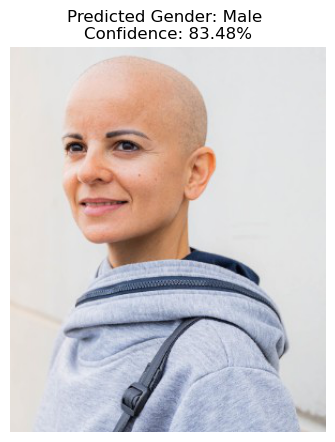

In [20]:
img = Image.open(foto_path)

plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis("off")
plt.title(f"Predicted Gender: {gender_target[prediction]} \nConfidence: {probabilities[0][prediction]*100:.2f}%", fontsize=12)
plt.show()